In [ ]:
import numpy as np
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
train_data.shape

(60000, 28, 28)

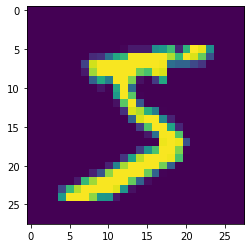

In [ ]:
plt.imshow(train_data[0]) #son imagenes

In [ ]:
train_labels[55]

8

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2547 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1035 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9891


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0.9790


[0.06567536294460297, 0.9789999723434448]

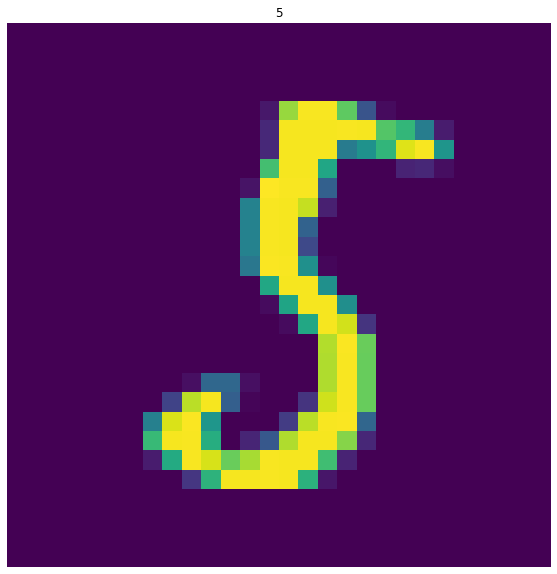

In [ ]:
# Selecciona un numero al azar dentro de x_test
index = 1082
plt.figure(figsize=(10,10))
d_image = x_test[index]
plt.imshow(d_image.reshape(28, 28))
# plt.title(y_test[index]) # para verlo como array
plt.title( np.argmax(y_test[index], axis=-1) ) # para ver el numero como tal
plt.axis(False)
plt.show()

In [ ]:
prediccion_array = model.predict(x_test[index].reshape(1,28*28))

print('el numero es:',np.argmax(prediccion_array, axis=-1), 'cierto?')

el numero es: [5] cierto?
